Installation of Libraries

In [1]:
import tensorflow as tf
print(tf.__version__)


2.20.0


In [2]:
import gradio as gr
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from tensorflow import keras
import keras.layers
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os
import random
from tensorflow.keras import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.models import load_model
import PIL.Image as Image
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import (accuracy_score,f1_score,roc_auc_score,recall_score,precision_score,confusion_matrix,roc_curve)
import medmnist
from medmnist import PneumoniaMNIST


In [3]:
IMAGE_SIZE=224
CHANNELS=3
BATCH_SIZE=32

Importing the Datasets

In [4]:
train_data=PneumoniaMNIST(split="train",download=True,size=224)
test_data=PneumoniaMNIST(split="test",download=True,size=224)
valid_data=PneumoniaMNIST(split="val",download=True,size=224)

In [5]:
x_train=train_data.imgs
y_train=train_data.labels
x_test=test_data.imgs
y_test=test_data.labels
x_valid=valid_data.imgs
y_valid=valid_data.labels

In [6]:
print("Size of Training Set : {} ".format(len(x_train)))
print("Size of Testing Set : {} ".format(len(x_test)))
print("Size of Validation Set : {} ".format(len(x_valid)))


Size of Training Set : 4708 
Size of Testing Set : 624 
Size of Validation Set : 524 


Data Cleaning

In [7]:

x_train = tf.expand_dims(x_train, axis=-1)
x_valid = tf.expand_dims(x_valid, axis=-1)
x_test = tf.expand_dims(x_test, axis=-1)

x_train = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_train))
x_valid = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_valid))
x_test = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_test))

Data Visualization

In [8]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, '[0]')

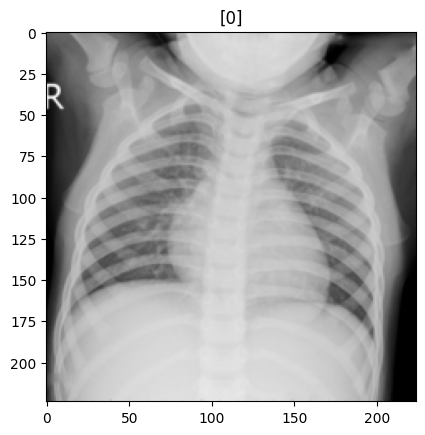

In [9]:
plt.imshow(x_train[20])
plt.title(y_train[20])

Text(0.5, 1.0, '[1]')

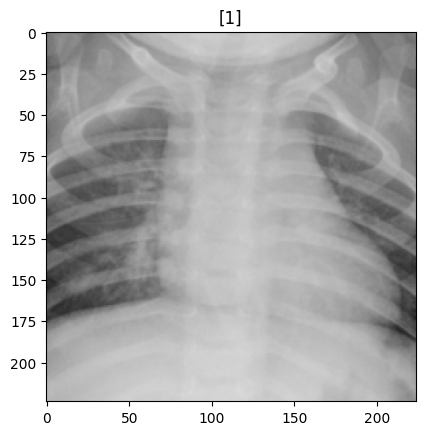

In [10]:
plt.imshow(x_train[50],cmap="gray")
plt.title(y_train[50])

Model Building

In [11]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
)

base_model.trainable = False  # freeze backbone

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),   # 🚀 replaces Flatten
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    ModelCheckpoint(
        'model.keras',
        save_best_only=True,
        monitor='val_loss',
        verbose=1
    ),
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    epochs=1,        # you don’t need 35
    batch_size=32,    # increase if memory allows
    callbacks=callbacks,
    verbose=1
)

model.save('model.keras')


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9032 - loss: 0.2274
Epoch 1: val_loss improved from None to 0.11362, saving model to model.keras
148/148 ━━━━━━━━━━━━━━━━━━━━ 651s 4s/step - accuracy: 0.9367 - loss: 0.1544 - val_accuracy: 0.9561 - val_loss: 0.1136
Restoring model weights from the end of the best epoch: 1.


Model Evaluation

In [12]:
all_predictions = []
all_labels = []
for i in range(len(x_test)):
    image = np.expand_dims(x_test[i], axis=0)
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions, axis=1)[0]
    all_predictions.append(predicted_class)
    all_labels.append(y_test[i])
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [13]:
accuracy = accuracy_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')

print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Recall: ", recall)
print("Precision: ", precision)
print("Confusion Matrix: ")
print(confusion_matrix(all_labels,all_predictions))

Accuracy:  0.8253205128205128
F1 Score:  0.8104192930849325
Recall:  0.8253205128205128
Precision:  0.859085036410618
Confusion Matrix: 
[[127 107]
 [  2 388]]


Model Deployment

In [14]:
model = load_model('model.keras')

In [16]:
def image_preprocess(image_path):
  img=Image.open(image_path).convert('RGB')
  img=img.resize((224,224))
  img=np.array(img)
  return img


def predict(image_path):
  img=image_preprocess(image_path)
  img=np.expand_dims(img,axis=0)
  pred=model.predict(img)
  pred_class=np.argmax(pred[0])
  if pred_class==0:
    return "Absence of Pneumonia"
  else:
    return "Presence of Pneumonia"
print(predict('IM-0001-0001.jpeg'))
print(predict('person100_bacteria_475.jpeg'))



1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Absence of Pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
Presence of Pneumonia


In [17]:
interface = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="filepath"),
    outputs=gr.Label(num_top_classes=2),
    title="AI Driven Medical Diagnosis of Pneumonia",
    description="Please Upload a Chest X Ray"
).launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
Created dataset file at: .gradio\flagged\dataset1.csv
* Running on public URL: https://b80eb8f38b7901b088.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
